In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/cleaned_data.csv")

In [39]:
bbox = ((df.long.min(), df.long.max(),      
         df.lat.min(), df.lat.max()))

### Create extra columns for every weather and lighting situation

In [4]:
df["daylight"] = list(map(lambda x: 1 if x == 0 else 0, df.ulichtverh))
df["dusk"] = list(map(lambda x: 1 if x == 1 else 0, df.ulichtverh))
df["dark"] = list(map(lambda x: 1 if x == 2 else 0, df.ulichtverh))
df.drop("ulichtverh", axis = 1, inplace = True)

In [5]:
df["dry"] = list(map(lambda x: 1 if x == 0 else 0, df.ustrzustand))
df["wet"] = list(map(lambda x: 1 if x == 1 else 0, df.ustrzustand))
df["ice"] = list(map(lambda x: 1 if x == 2 else 0, df.ustrzustand))
df.drop("ustrzustand", axis = 1, inplace = True)

In [6]:
df["y2018"] = list(map(lambda x: 1 if x == 2018 else 0, df.ujahr))
df["y2019"] = list(map(lambda x: 1 if x == 2019 else 0, df.ujahr))
df["y2020"] = list(map(lambda x: 1 if x == 2020 else 0, df.ujahr))
df.drop("ujahr", axis = 1, inplace = True)

In [7]:
df["jan"] = list(map(lambda x: 1 if x == 1 else 0, df.umonat))
df["feb"] = list(map(lambda x: 1 if x == 2 else 0, df.umonat))
df["mar"] = list(map(lambda x: 1 if x == 3 else 0, df.umonat))
df["apr"] = list(map(lambda x: 1 if x == 4 else 0, df.umonat))
df["may"] = list(map(lambda x: 1 if x == 5 else 0, df.umonat))
df["jun"] = list(map(lambda x: 1 if x == 6 else 0, df.umonat))
df["jul"] = list(map(lambda x: 1 if x == 7 else 0, df.umonat))
df["aug"] = list(map(lambda x: 1 if x == 8 else 0, df.umonat))
df["sep"] = list(map(lambda x: 1 if x == 9 else 0, df.umonat))
df["oct"] = list(map(lambda x: 1 if x == 10 else 0, df.umonat))
df["nov"] = list(map(lambda x: 1 if x == 11 else 0, df.umonat))
df["dec"] = list(map(lambda x: 1 if x == 12 else 0, df.umonat))
df.drop("umonat", axis = 1, inplace = True)

In [8]:
df["sun"] = list(map(lambda x: 1 if x == 1 else 0, df.uwochentag))
df["mon"] = list(map(lambda x: 1 if x == 2 else 0, df.uwochentag))
df["tue"] = list(map(lambda x: 1 if x == 3 else 0, df.uwochentag))
df["wed"] = list(map(lambda x: 1 if x == 4 else 0, df.uwochentag))
df["thu"] = list(map(lambda x: 1 if x == 5 else 0, df.uwochentag))
df["fri"] = list(map(lambda x: 1 if x == 6 else 0, df.uwochentag))
df["sat"] = list(map(lambda x: 1 if x == 7 else 0, df.uwochentag))
df.drop("uwochentag", axis = 1, inplace = True)

In [9]:
df["morning"] = list(map(lambda x: 1 if x == "morning" else 0, df.time_of_day))
df["afternoon"] = list(map(lambda x: 1 if x == "afternoon" else 0, df.time_of_day))
df["evening"] = list(map(lambda x: 1 if x == "evening" else 0, df.time_of_day))
df["night"] = list(map(lambda x: 1 if x == "night" else 0, df.time_of_day))
df.drop("time_of_day", axis = 1, inplace = True)

In [10]:
for _ in range(0,24):
    df[f"{_}hr"] = list(map(lambda x: 1 if x == _ else 0, df.ustunde))
df.drop("ustunde", axis = 1, inplace = True)

In [11]:
df["driving"] = list(map(lambda x: 1 if x == 1 else 0, df.utyp1))
df["turning"] = list(map(lambda x: 1 if x == 2 else 0, df.utyp1))
df["turn_in"] = list(map(lambda x: 1 if x == 3 else 0, df.utyp1))
df["crossing"] = list(map(lambda x: 1 if x == 4 else 0, df.utyp1))
df["standing_traffic"] = list(map(lambda x: 1 if x == 5 else 0, df.utyp1))
df["longitudinal_traffic"] = list(map(lambda x: 1 if x == 6 else 0, df.utyp1))
df["other"] = list(map(lambda x: 1 if x == 7 else 0, df.utyp1))
df.drop("utyp1", axis = 1, inplace = True)

In [12]:
df.drop(["weekday", "light_condition", "street_condition", "uart"], axis = 1, inplace = True)

In [15]:
print("Longitude:", min(df.long), max(df.long), " - Delta:", round(max(df.long)-min(df.long),5))
print("Latitude :", min(df.lat), max(df.lat), " - Delta:", round(max(df.lat)-min(df.lat),5))

Longitude: 52.34653157 52.66015  - Delta: 0.31362
Latitude : 13.09467645 13.74096  - Delta: 0.64628


### Coordinate range

Using [calculator.net](https://www.calculator.net/distance-calculator.html) the range between the minimum and maximum longitude is **34.01 km** and between the minimum and maximum latitude is **71.50 km**.


In [16]:
step = 0.001 # equals around 111 m
to_bin = lambda x: np.floor(x / step) * step
df["lat_bin"] = to_bin(df.lat)
df["lon_bin"] = to_bin(df.long)
lat_long_groups = df.groupby(["lon_bin", "lat_bin"]).sum()

In [17]:
lat_long_groups.drop(["long", "lat"], axis = 1, inplace = True)

In [18]:
lat_long_groups[lat_long_groups.ist_rad == max(lat_long_groups.ist_rad)]

,,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,ukategorie,daylight,dusk,dark,...,21hr,22hr,23hr,driving,turning,turn_in,crossing,standing_traffic,longitudinal_traffic,other
lon_bin,lat_bin,,,,,,,,,,,,,,,,,,,,,
52.503,13.41,30,27,1,1,0,6,101,23,1,11,...,1,1,1,3,12,19,0,0,0,1


In [41]:
most_acc_dict = {}
for col in lat_long_groups:
    most_acc_dict[col] = {"long": round(lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][0], 7),
                         "lat": round(lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][1], 7),}
    # print(col, lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][0])
# pd.DataFrame.from_dict(most_acc_dict, orient='index').to_csv("./data/most_acc_latlong_by_category.csv", index = True)
df_ = pd.DataFrame.from_dict(most_acc_dict, orient='index')

In [52]:
df_

,long,lat
ist_rad,52.503,13.410
ist_pkw,52.538,13.326
ist_fuss,52.534,13.199
ist_krad,52.517,13.440
ist_gkfz,52.528,13.282
...,...,...
turn_in,52.552,13.427
crossing,52.457,13.578
standing_traffic,52.501,13.337
longitudinal_traffic,52.528,13.282


(13.09467645, 13.74096)

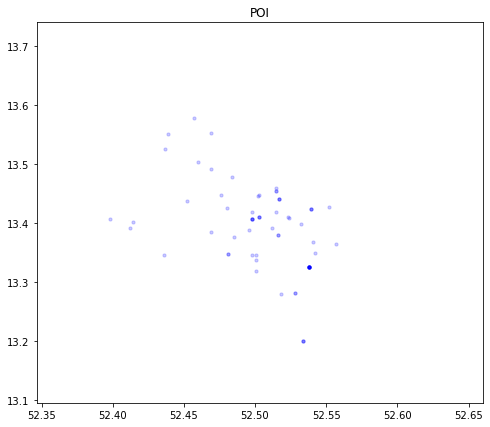

In [45]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_.long, df_.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('POI')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])


In [48]:
def return_most_acc_df(this_df):
    step = 0.001 # equals around 111 m
    to_bin = lambda x: np.floor(x / step) * step
    this_df["lat_bin"] = to_bin(this_df.lat)
    this_df["lon_bin"] = to_bin(this_df.long)
    lat_long_groups = df.groupby(["lon_bin", "lat_bin"]).sum()
    most_acc_dict = {}
    for col in lat_long_groups:
        most_acc_dict[col] = {"long": round(lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][0], 7),
                             "lat": round(lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][1], 7),}
        # print(col, lat_long_groups[lat_long_groups[col] == max(lat_long_groups[col])].index[0][0])
    # pd.DataFrame.from_dict(most_acc_dict, orient='index').to_csv("./data/most_acc_latlong_by_category.csv", index = True)
    return pd.DataFrame.from_dict(most_acc_dict, orient='index')
    

In [49]:
tester = return_most_acc_df(df[df.])
tester

,long,lat
long,52.538,13.326
lat,52.538,13.326
ist_rad,52.503,13.410
ist_pkw,52.538,13.326
ist_fuss,52.534,13.199
...,...,...
turn_in,52.552,13.427
crossing,52.457,13.578
standing_traffic,52.501,13.337
longitudinal_traffic,52.528,13.282
